# Titanic Survival Analysis
Source: https://www.kaggle.com/c/titanic/overview

# Introduction
This dataset contains the information of the passengers who were on board Titanic when she sank on April 15, 1912 resulting in the deaths of 1502 out of 2224 passengers and crew.

# Environment Set-up

Import necessary packages

In [1]:
import os # Interaction with Operating System
import sys # Load Packages
import pandas as pd # Data Preprocessing and Analysis 
import numpy as np # Scientific Computing Foundations
import scipy as sp # Scientific Computing and Advance Mathematic

import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns 
import IPython
from IPython import display # Pretty printing of dataframe
%matplotlib inline

import time
import random as rnd
import joblib # Pick the best model and save out so it can be used later

import sklearn # Machine Learning Alorithms
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = UserWarning)

Check directory content

In [2]:
print(os.listdir("../Titanic"))

['test.csv', 'MLP_model.pkl', 'GB_model.pkl', '.ipynb_checkpoints', 'KNN_model.pkl', 'Titanic Survival Analysis.ipynb', 'SVM_model.pkl', 'SGD_model.pkl', 'train.csv', 'LR_model.pkl', 'RF_model.pkl']


# Data Preparation

Load data from train.csv into titanic dataframe

In [3]:
titanic = pd.read_csv('../Titanic/train.csv')

Preview top 5 rows of titanic dataframe

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here, we could see the following attribute types:
- Categorical: Sex, Survived, Embarked
- Ordinal: Pclass
- String: Name
- Continuous: Age, Fare
- Discrete: SibSp, Parch

# Data Overview
Data Information
- PassengerId: Id of passengers
- Survived: Survival (1: Yes, 0: No)
- Pclass: Ticket Class, a proxy for socio-economic status (SES) (1: 1st/Upper, 2: 2nd/Middle, 3: 3rd/Lower)
- Name: Name of passengers
- Sex: Gender 
- Age: Ages in year (Fractional if less than 1, and if estimated, then it is in the form of xx.5)
- SibSp: Number of Siblings and Spouses aboard the Titanic
- Parch: Number of Parents and Children aboard the Titanic
- Ticket: Ticket Number
- Fare: Passenger fare
- Cabin: Cabin Number
- Embarked: Port of Embarkation (C: Cherbourg, Q: Queenstown, S: Southampton) 

Check basic distribution

In [5]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Parrish, Mrs. (Lutie Davis)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Check missing values

In [6]:
print(f"Missing value frequency")
titanic.isnull().sum()

Missing value frequency


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, we could see that some attributes, like Age, Cabin, and Embarked are missing some values

# Data Exploration

Analyze 'PClass' against the survival rate by pivoting features

In [7]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Here, we could observe significant correlation (>50%) among Pclass = 1 and Survived. 

Analyze 'Sex' against the survival rate by pivoting features

In [8]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Here, we could observe significant correlation (>70%) among Sex = Female and Survived, which allows us to conclude that female passengers had very high survival rate as compared to male passengers.

Analyze 'SibSp' against the survival rate by pivoting features

In [9]:
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Analyze 'Parch' against the survival rate by pivoting features

In [10]:
titanic[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Here, in the two figures, we could see that passengers in family size > 3 tends to have lower survival rate < 20%. 

Create visual plot of 'SibSp' and 'Parch' relationship against 'Survived'

<Figure size 432x288 with 0 Axes>

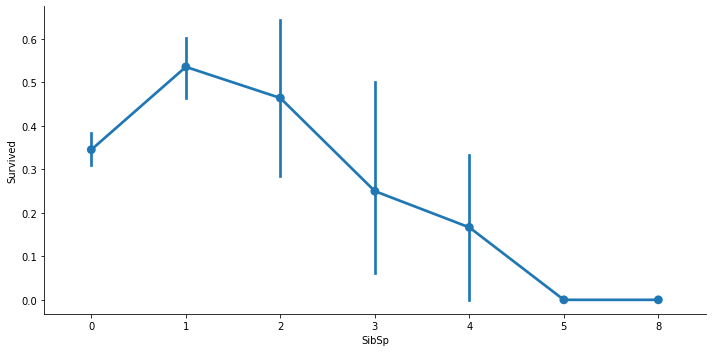

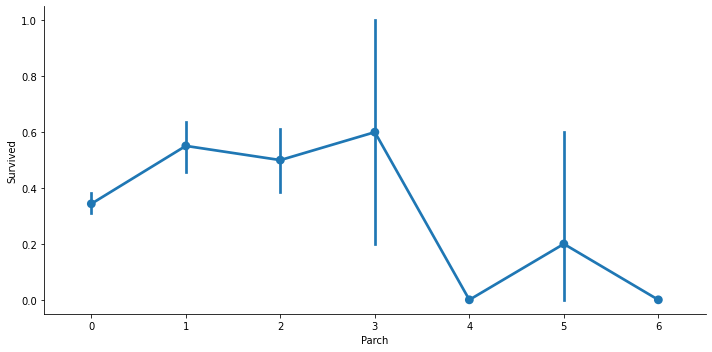

In [11]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x = col, y = 'Survived', data = titanic, kind = 'point', aspect = 2)
plt.show()

Here, the points indicate the survival rate for each level of given feature. The vertical bar is an error bar that corresponds to the sample size at each level, with larger bar indicating a smaller sample size. From these 2 figures, we can observe similar trend that indicates that as people have more companions (siblings, spouse, parents, and children), they are less likely to survive. Thus, we can combine these two features into a new feature, 'FamilySize'.

Combine 'SibSp' and 'Parch' attributes into 'FamilySize' attribute and drop 'SibSp' and 'Parch' to reduce occurence of multicollinearity issues, as well as 'PassengerId'

In [12]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


Analyze 'FamilySize' against the survival rate

In [13]:
titanic[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


Create attribute 'IsAlone' for FamilySize = 1

In [14]:
titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


Analyze 'IsAlone' against the survival rate

In [15]:
titanic[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
1,1,0.552795
0,0,0.346575


Analyze have 'Cabin' against the survival rate, 

In [16]:
titanic.groupby(titanic['Cabin'].isnull(), as_index = False)['Survived'].mean()

,Survived
0,0.666667
1,0.299854


Here, we could see that the survival rate is drastically lower when cabin in missing (1: < 30%), which allows us to observe that passenger without a cabin are very unlikely to survive. So, it might be better to create a new indicator for passengers with and without 'Cabin'

Create 'Cabin_ind' attribute

In [17]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0,0


Fill missing values for Age with its mean, since it was missing at random

In [18]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

Plot 'Age', 'Sex' against 'Survived' 

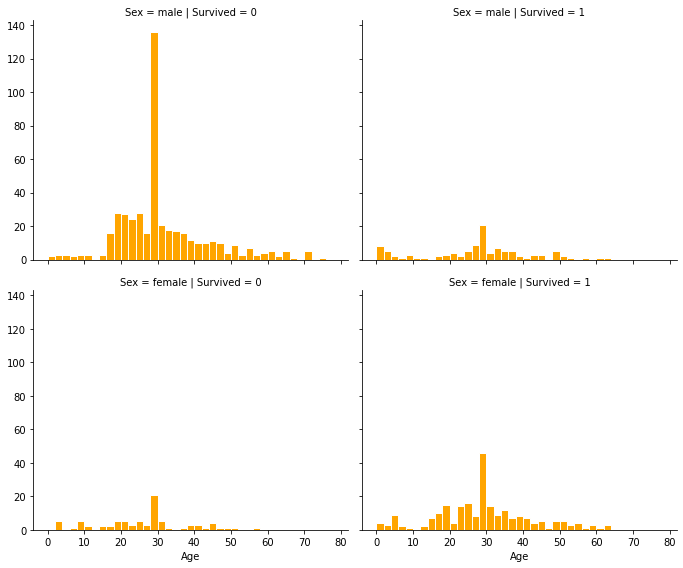

In [19]:
g = sns.FacetGrid(titanic, col = 'Survived', row = 'Sex', height = 4, aspect = 1.2)
g.map(plt.hist, 'Age', bins = np.arange(0, max(titanic['Age']), 2), color = 'orange', edgecolor = 'w')

Here, we could see that most of the passengers are of range 15-35, children female are more likely to survive, children less than 10 years old are more likely to survive as compared to the elderly.

Plot 'Pclass' and 'Survived' against 'Age'

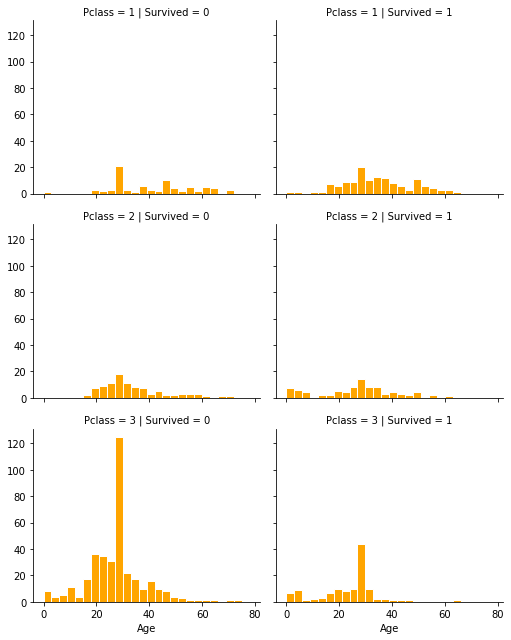

In [20]:
g = sns.FacetGrid(titanic, col = 'Survived', row = 'Pclass', height = 3, aspect = 1.2)
g.map(plt.hist, 'Age', bins = np.arange(0, max(titanic['Age']), 3), color = 'orange', edgecolor = 'w')

Here, we could observe that Pclass = 3 has most passengers, but most didn't survive, that infants for both Pclass = 2 and Pclass = 3 do survive, and that most of the passengers of Pclass = 1 does survive.

Analyze 'Embarked' against the survival rate by pivoting features

In [21]:
titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Plot the relationship between 'Pclass', 'Sex', and 'Survived'

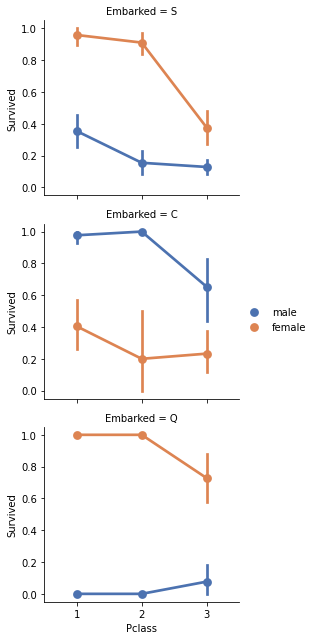

In [22]:
g = sns.FacetGrid(titanic, row = 'Embarked', height = 3, aspect = 1.2)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = "deep", edgecolor = 'w')
g.add_legend()

Here, we could observe that male embarked from C tends have higher survival rate and that female have better survival rate than males. 

Plot 'Fare', 'Sex', and 'Embarked' against 'Survival'

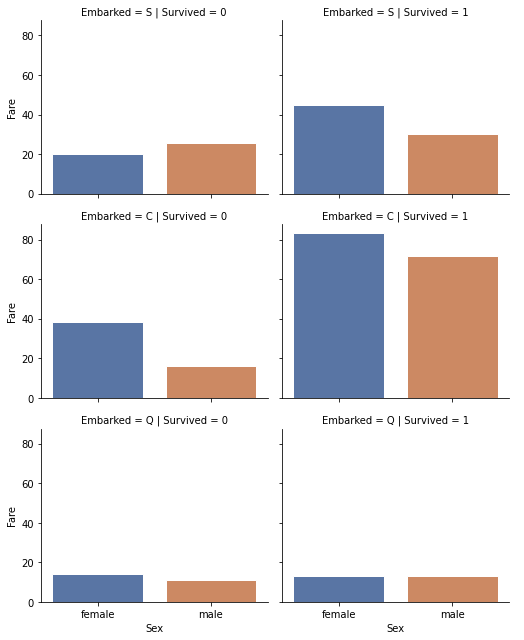

In [23]:
g = sns.FacetGrid(titanic, row = 'Embarked', col = 'Survived', height = 3, aspect = 1.2)
g.map(sns.barplot, 'Sex', 'Fare', palette = "deep", edgecolor = 'w', ci = None)
g.add_legend()

Here, we could see that passengers that embarked from C tends to pay higher fare as compared to those embarked from S and Q, and that leads to them having higher survival rate

# Data Preprocessing

Convert categorical attribute 'Sex' to numeric type

In [24]:
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0,0


Drop unnecessary attributes

In [25]:
titanic.drop(['Cabin', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,Cabin_ind
0,0,3,0,22.0,7.2500,1,1,0
1,1,1,1,38.0,71.2833,1,1,1
2,1,3,1,26.0,7.9250,0,0,0
3,1,1,1,35.0,53.1000,1,1,1
4,0,3,0,35.0,8.0500,0,0,0


Write out cleaned data
- titanic.to_csv('../Titanic/titanic_cleaned.csv', index = False)

# Split data into train, validation, and test set

Split data into features by dropping the survived field and labels which are the survived field

In [26]:
features = titanic.drop('Survived', axis = 1)
labels = titanic['Survived']

Split the features and labels into train, test, and validation set at ratio of 6:2:2

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)
a = [y_train, y_val, y_test]
for dataset in a:
    if dataset.equals(y_test):
        print(f"{round(len(dataset) / len(labels), 2)*100:.0f}%")
        break
    print(f"{round(len(dataset) / len(labels), 2)*100:.0f}%", end = " - ")
    

60% - 20% - 20%


# Model Building

Regression 
- a statistical process for estimating the relationships among variables, often to make a prediction about some outcome.

Linear Regression
- a type of regression that is used on a continuous target variable
- y = mx + b
- Linear regression will try to fit a line that fits all of the data and it will end up predicting negative values and values over one, which is impossible

# Logistic Regression: Hyperparameters

Logistic Regression
- a form of regression where the target variable is binary
- y = 1 / (1 + e^(-(mx + b)))
- Logistic regression is built off of a logistic or sigmoid curve (S shape), which will always be between 0 and 1 and this makes it a better fit for binary classification problem. It should be used anytime there is a binary target variable. It is also one of the more transparent algorithm, in the sense that it allows the user to guage the importance of individual predictors by R ratio. It should be use when there is a fairly well-behaved data (not many outliers, not too many missing values, not skewed features, and those that contains relationships that aren't too complex. As such, it is relatively flexible and fast to train.
- However, it shouldn't be used when there is a continuous target variable. And if there is massive amount of data (rows or columns), use other better alternative. 
- Hyperparameters:
    - LogisticRegression(C = 1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, max_iter = 100, multi_class = 'warn', n_jobs = None, penalty = '12', random_state = None, solver = 'warn', tol = 0.0001, verbose = 0, warm_start = False)
        - Hyperparameter:
            - C: a regularization parameter in logistic regression that controls how closely the model fits the training data. Regularization is a technique used to reduce overfitting by discouraging overly complex models in some way. 
                - C = 1 / lamda, where when lamda -> 0, C -> infinity and this indicates low regularization, which is going to lead to more complex models and more likely to overfit. This also means that as lamda -> infinity, C -> 0, and this indicates high regularization, low complexity, and more likely to underfit. So, smallest C parameter indicates the highest regularization, thus the model will have harder time spliting data into groups. 
            

Create 'print_results' function

In [28]:
def print_results(results):
    print(f"Best Params: {results.best_params_}\n")
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f"{round(mean, 3)} (+/-{round(std*2, 3)}) for {params}")

Create Logistic Regression object, lr as well as define the parameters that shall be pass into GridSearchCV 5-fold
- K-fold Cross-Validation
    - It takes the dataset and split it into k-subset, and it will iterate through the k-subset k times. And on each loop, it will fit the model on k-1 subsets, and test it on the remaining subset. This will generate performance metrics for each loop

In [29]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv = GridSearchCV(lr, parameters, cv = 5)
cv.fit(x_train, y_train.values.ravel())
print_results(cv)

Best Params: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.712 (+/-0.099) for {'C': 0.01}
0.783 (+/-0.144) for {'C': 0.1}
0.803 (+/-0.108) for {'C': 1}
0.802 (+/-0.107) for {'C': 10}
0.8 (+/-0.105) for {'C': 100}
0.8 (+/-0.103) for {'C': 1000}


Here, we could see that when C is very low, which means high regularization, the model is not performing very well and it is likely because high regularization causes the model to underfit. 

Display the best hyperparameters for the model

In [30]:
cv.best_estimator_

LogisticRegression(C=1)

Store the best model in pkl format

In [31]:
joblib.dump(cv.best_estimator_, '../Titanic/LR_model.pkl')

['../Titanic/LR_model.pkl']

# Support Vector Machine (SVM): Hyperparameters

Support Vector Machine
- A classifier that finds an optimal hyperplane that maximizes the margin between two classes. Mathematically, it's defined as maximizing the margin between your decision boundary and the closest points. Support vector is the name for the perpendicular line that from your decision boundary to the closest points in both classes. Hyperplane is a generalized term to identify the decision boundary in n-dimensional space. It uses the Kernel Trick (Kernel method), which is a method that transforms data that is not linearly separable in n-dimensional space to a higher dimension where it is linearly separable. When given a set of training samples, each marked as belonging to one or the other of the two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it non-probabilistic binary linear classifier.
- Support Vector Machine should be used when dealing with binary target variable, and it excels when the feature-to-row ratio is very high (short-and-fat data, lots of features and relatively few rows). It is also good at untangling complex relationships. It also handles data with lots of outliers quite well. 
- It should not be use when the feature-to-row ratio is very low, as it will take a long time to train, and the performance won't be worth it when compared to other algorithms. It is also not the right choice when looking for a quick benchmark model. 
- Hyperparameters:
    - SVC(C = 1.0, cache_size = 200, class_weight = None, coef0 = 0.0, decision_function_shape = 'ovr', degree = 3, gamma = 'auto_deprecated', kernel = 'rbf', max_iter = -1, probability = False, random_state = None, shrinking = True, tol = 0.001, verbose = False)
        - Hyperparameter: 
            - C: a penalty term that determines how closely the model fits to the training set.
                - C -> infinity indicates low regularization because there is large penalty for misclassification in training set, which means that it will try to fit to every single point in the training set because it doesn't want to incur the penalty for misclassifying them and it would result in a smaller margin and potential for overfit. On the other hand, C -> 0 indicates small penalty for misclassification in training, which means the model will be more willing to misclassify training examples if it thinks it's doing a better job of capturing the overall pattern in the data, thus larger margin between the hyperplane and the closest points.
            - kernel: control the type of transformation that is going to apply to the data in order to make it linearly separable using kernel trick.

In [32]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}
cv = GridSearchCV(svc, parameters, cv = 5)
cv.fit(x_train, y_train.values.ravel())
print_results(cv)

Best Params: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.652 (+/-0.054) for {'C': 0.1, 'kernel': 'rbf'}
0.794 (+/-0.11) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.794 (+/-0.11) for {'C': 10, 'kernel': 'linear'}
0.68 (+/-0.069) for {'C': 10, 'kernel': 'rbf'}


Here, we could see that C hyperparameter isn't really having any impact on the accuracy for the linear kernel, and that the linear kernel is doing drastically better than the rbf kernel, which suggests that the data is linearly separable.

Display the best hyperparameters for the model

In [33]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

Store the best model in pkl format

In [34]:
joblib.dump(cv.best_estimator_, '../Titanic/SVM_model.pkl')

['../Titanic/SVM_model.pkl']

# K-Nearest Neighbors: Hyperparameters

K-Nearest Neighbors (KNN)
- A non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k: positive integer and typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
- Hyperparameters:
    - KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

In [35]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
cv = GridSearchCV(knn, parameters, cv = 5)
cv.fit(x_train, y_train.values.ravel())
print_results(cv)

Best Params: {'n_neighbors': 3}

0.683 (+/-0.023) for {'n_neighbors': 1}
0.669 (+/-0.064) for {'n_neighbors': 2}
0.697 (+/-0.046) for {'n_neighbors': 3}
0.667 (+/-0.047) for {'n_neighbors': 4}
0.68 (+/-0.043) for {'n_neighbors': 5}
0.663 (+/-0.039) for {'n_neighbors': 6}
0.674 (+/-0.056) for {'n_neighbors': 7}
0.672 (+/-0.048) for {'n_neighbors': 8}
0.674 (+/-0.05) for {'n_neighbors': 9}
0.678 (+/-0.051) for {'n_neighbors': 10}


Display the best hyperparameters for the model

In [36]:
cv.best_estimator_

KNeighborsClassifier(n_neighbors=3)

Store the best model in pkl format

In [37]:
joblib.dump(cv.best_estimator_, '../Titanic/KNN_model.pkl')

['../Titanic/KNN_model.pkl']

# Stochastic Gradient Descent: Hyperparameters

Stochastic Gradient Descent
- Hyperparameters:
    - SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
        - Hyperparameter:
            - loss: loss function
                - 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', or a regression loss: 'squared_loss', 'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'

In [38]:
sgd = SGDClassifier()
parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'loss': ['hinge', 'log'] # log: logistic regression
}
cv = GridSearchCV(sgd, parameters, cv = 5)
cv.fit(x_train, y_train.values.ravel())
print_results(cv)

Best Params: {'alpha': 0.01, 'loss': 'log'}

0.528 (+/-0.227) for {'alpha': 0.0001, 'loss': 'hinge'}
0.689 (+/-0.081) for {'alpha': 0.0001, 'loss': 'log'}
0.689 (+/-0.099) for {'alpha': 0.001, 'loss': 'hinge'}
0.655 (+/-0.084) for {'alpha': 0.001, 'loss': 'log'}
0.648 (+/-0.056) for {'alpha': 0.01, 'loss': 'hinge'}
0.727 (+/-0.128) for {'alpha': 0.01, 'loss': 'log'}
0.65 (+/-0.038) for {'alpha': 0.1, 'loss': 'hinge'}
0.618 (+/-0.263) for {'alpha': 0.1, 'loss': 'log'}
0.667 (+/-0.07) for {'alpha': 1, 'loss': 'hinge'}
0.682 (+/-0.086) for {'alpha': 1, 'loss': 'log'}
0.674 (+/-0.074) for {'alpha': 10, 'loss': 'hinge'}
0.652 (+/-0.082) for {'alpha': 10, 'loss': 'log'}
0.648 (+/-0.048) for {'alpha': 100, 'loss': 'hinge'}
0.674 (+/-0.085) for {'alpha': 100, 'loss': 'log'}
0.639 (+/-0.042) for {'alpha': 1000, 'loss': 'hinge'}
0.648 (+/-0.056) for {'alpha': 1000, 'loss': 'log'}


Here, we could see that loss function, loss = log (logistic regression) performs better than hinge, and that alpha of 0.001 performs relatively well as compared to other alpha values.

Display the best hyperparameters for the model

In [39]:
cv.best_estimator_

SGDClassifier(alpha=0.01, loss='log')

Store the best model in pkl format

In [40]:
joblib.dump(cv.best_estimator_, '../Titanic/SGD_model.pkl')

['../Titanic/SGD_model.pkl']

# Multi-Layer Perceptron: Hyperparameters

Multilayer Perceptron
- A classfic feed-forward artificial neural network. Also refers to as a connected series of nodes (in a form of a directed acyclic graph, meaning that there is directionality between nodes and no nodes will ever be revisited), where each node represents a function of a model.
- Multi-layer perceptron should be used when dealing with categorical (classification) or continuous (regression) target variable. This allows them to learn very complex relationships in the data. It is also used when there is a need for a lot of control over the training process.
- However, it isn't good for image recognition (convolutional neural networks works better for image recognition), time series, etc. It also doesn't offer transparency since it works like a black box, where inputs are passed in and it returns predictions, so it doesn't allow us to understand what's going on internally that is generating the outputs. It is also not good for a quick benchmark model. It is also not good when there is limited data available.
- Hyperparameters:
    - MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
    - MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
        - Hyperparameter:
            - activation: actiavation function dictates the type of non-linearity that is introduced to the model
                - Sigmoid (logistic curve: S-shape from 0 to 1)
                - TanH (hyperbolic tangent curve: S-shape between -1 and 1)
                - ReLU (rectify linear unit: sets a floor at 0, so if any number is below 0, it sets it to 0, and if it is above 0, it doesn't do anything)
            - hidden_layer_sizes: determines how many hidden layers there will be and how many nodes in each layer
            - learning_rate: facilitates both how quickly and whether or not the algorithm will find the optimal solution. Big learning rate: push the algorithm along quicker to find the optimal solution but it is possible that it pushes too far, and it never actually finds the best solution. Small learning rate: will take much longer for the algorithm to fit, but it will find the optimal solution. However, if the curve isn't pretty, it might result in local minima, which is a valley that the model thinks is the lowest point on the curve but its actually not
                - constant: It will take that inital learning rate and it will keep it constant throughout the entire optimization process
                - invscaling: Inverse Scaling, which gradually decreases the learning rate at each step, so this will allow the model to take large jumps at first, and slowly decreases as it gets closer and closer to the optimal model
                - adaptive: This will keep the learning rate constant as long as the training loss keeps decreasing. If the learning rate stops going down, then it will decrease the learning rate, so that it takes smaller step.

In [41]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', ]
}
cv = GridSearchCV(mlp, parameters, cv = 5)
cv.fit(x_train, y_train.values.ravel())
print_results(cv)

Best Params: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.755 (+/-0.109) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.792 (+/-0.112) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.802 (+/-0.105) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.678 (+/-0.059) for {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.787 (+/-0.142) for {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.802 (+/-0.097) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.682 (+/-0.085) for {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.757 (+/-0.075) for {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.774 (+/-0.139) for {'activation': 'logistic', 'hidden_layer_sizes': (100,), 

Here, we could see that the models with 10 hidden nodes appear to be a bit too simple, and increasing it to 50 and 100 improves the results pretty much across the board. In addition, the relu and tanh activation functions appear to generate better results than logistic activation functions.

Display the best hyperparameters for the model

In [42]:
cv.best_estimator_

MLPClassifier()

Store the best model in pkl format

In [43]:
joblib.dump(cv.best_estimator_, '../Titanic/MLP_model.pkl')

['../Titanic/MLP_model.pkl']

# Random Forest: Hyperparameters

Random Forest:
- A random forest merges a collection of independent decision trees to get a more accurate and stable prediction. A type of ensemble method, which combine several machine learning models in order to decrease both bias and variance
- Random forest works well for categorical or continuous target variable. It has the attribute that layouts the importance of each predictor that is being worked on, thus allows us to understand the relationships and the power of the features that are being used in the model. It is great for a quick benchmark, since it tends to perform quite well, relatively fast to train, and it's really quite flexible in the type of data it works well with. It also deals really with with messy data such as missing values and outliers.
- However, if the goal is to extract all possible value out of the data, it might not be the right tool. It is also not quick to make predictions. 
- Hyperparameters: 
    - RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
        - Hyperparameter:
            - n_estimators: number of estimators that controls how many individual decision trees will be built or basically the width of random forest
            - max_depth: depth of the trees, how deep each individual decision tree can go, thus constrains how many levels of splits the tree can make. In other words, it controls the complexity of the model and determines how closely it will fit to the training data

In [44]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}
# This None setting will let the tree go as deep as it wants until it reaches some level of training error tolerance that is defined within random forest classfier
cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(x_train, y_train.values.ravel())
print_results(cv)

Best Params: {'max_depth': 8, 'n_estimators': 5}

0.772 (+/-0.153) for {'max_depth': 2, 'n_estimators': 5}
0.803 (+/-0.121) for {'max_depth': 2, 'n_estimators': 50}
0.803 (+/-0.109) for {'max_depth': 2, 'n_estimators': 250}
0.822 (+/-0.105) for {'max_depth': 4, 'n_estimators': 5}
0.811 (+/-0.099) for {'max_depth': 4, 'n_estimators': 50}
0.817 (+/-0.124) for {'max_depth': 4, 'n_estimators': 250}
0.824 (+/-0.049) for {'max_depth': 8, 'n_estimators': 5}
0.82 (+/-0.074) for {'max_depth': 8, 'n_estimators': 50}
0.818 (+/-0.064) for {'max_depth': 8, 'n_estimators': 250}
0.779 (+/-0.036) for {'max_depth': 16, 'n_estimators': 5}
0.807 (+/-0.028) for {'max_depth': 16, 'n_estimators': 50}
0.805 (+/-0.027) for {'max_depth': 16, 'n_estimators': 250}
0.798 (+/-0.07) for {'max_depth': 32, 'n_estimators': 5}
0.809 (+/-0.032) for {'max_depth': 32, 'n_estimators': 50}
0.805 (+/-0.031) for {'max_depth': 32, 'n_estimators': 250}
0.787 (+/-0.066) for {'max_depth': None, 'n_estimators': 5}
0.809 (+/-0.025)

Here, we could see that 5 estimators performs relatively poorer compared to higher number of estimators. It also shows that max_depth of 4 does relatively well as compared to higher number of max_depth, which may indicate over-fitting.

Display the best hyperparameters for the model

In [45]:
cv.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=5)

Store the best model in pkl format

In [46]:
joblib.dump(cv.best_estimator_, '../Titanic/RF_model.pkl')

['../Titanic/RF_model.pkl']

# Gradient Boosting: Hyperparameters

Boosting:
- An ensembling method that aggregates a number of weak models (weak model is one that is slightly better than random guessing) to create one strong model (one that is strongly correlated with the true classification). It effectively learns from its mistakes with each iteration. 
- Gradient Boosting makes use of shallow (simple) decision trees. Its algorithm will evaluate the performances of the weak model and then it will resample while overweighting the examples that were misclassified by the first model. It takes the n-weak models that were generated during the training process, and feed in the example from the test set, and each model would end up generating a prediction. It's a weighted voting based on how well each individual model performed in the training. It requires those high bias shallow decision trees in order to reduce error and generate better predicitons.
- Boosting can be used for categorical and continuous target variable. It is useful for nearly any type of problem. It is also makes fast predictions. 
- However, it isn't transparent. It is slow to train. It tends to overfit so it shouldn't be used on noisy data.
- Hyperparameters:
    - GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
    - Hyperparamater:
        - n_estimators: number of trees
        - max_depth: depths of trees typically lower than what is being set in random forest (should be shallower)
        - learning_rate: controls the actual value of learning rate, and it stays constant across the whole optimization process. 

In [47]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}
cv = GridSearchCV(gb, parameters, cv = 5)
cv.fit(x_train, y_train.values.ravel())
print_results(cv)

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.837 (+/-0.075) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.82 (+/-0.051) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.817 (+/-0.04) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.822 (+/-0.039) for {'learning_rat

Display the best hyperparameters for the model

In [48]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

Store the best model in pkl format

In [49]:
joblib.dump(cv.best_estimator_, '../Titanic/GB_model.pkl')

['../Titanic/GB_model.pkl']

# Model Comparison

Accuracy vs Latency
- Latency: How long it takes to train? How long will it take to predict?
- Accuracy: How do they handle data of different sizes? How will they handle the complexity of feature relationships? How will they handle messy data?
- Evaluate models on validation set
    - Accuracy: (# of predictions) / (total # of examples)
    - Precision: (# of predicted as surviving that actually survived) / (total # predicted to survive)
        - When model predict someone would survive, how often did they acutally survive?
    - Recall: (# predicted as surviving that actually survived) / (total # that actually survived)
        - What is the likelihood that the model correctly predicted that they would survive?

In [50]:
models = {}
for mdl in ['LR', 'SVM', 'KNN', 'SGD', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load(f'../Titanic/{mdl}_model.pkl')
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=0.1, kernel='linear'),
 'KNN': KNeighborsClassifier(n_neighbors=3),
 'SGD': SGDClassifier(alpha=0.01, loss='log'),
 'MLP': MLPClassifier(),
 'RF': RandomForestClassifier(max_depth=8, n_estimators=5),
 'GB': GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)}

In [51]:
def evaluate_model(name, model, features, labels):
    start = time.time()
    pred = model.predict(features)
    end = time.time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print(f"{name} -- Accuracy: {accuracy} / Precision: {precision} / Recall: {recall} / Latency: {round((end - start)*1000, 1)} ms")

In [52]:
# y_val = pd.DataFrame(y_val).reset_index(drop=True)
for name, mdl in models.items():
    evaluate_model(name, mdl, x_val, y_val)

LR -- Accuracy: 0.775 / Precision: 0.712 / Recall: 0.646 / Latency: 4.1 ms
SVM -- Accuracy: 0.747 / Precision: 0.672 / Recall: 0.6 / Latency: 8.1 ms
KNN -- Accuracy: 0.736 / Precision: 0.661 / Recall: 0.569 / Latency: 15.7 ms
SGD -- Accuracy: 0.775 / Precision: 0.651 / Recall: 0.831 / Latency: 1.9 ms
MLP -- Accuracy: 0.764 / Precision: 0.689 / Recall: 0.646 / Latency: 2.0 ms
RF -- Accuracy: 0.787 / Precision: 0.737 / Recall: 0.646 / Latency: 2.6 ms
GB -- Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency: 3.2 ms


In [54]:
evaluate_model('Gradient Boosting', models['GB'], x_test, y_test)

Gradient Boosting -- Accuracy: 0.816 / Precision: 0.852 / Recall: 0.684 / Latency: 13.1 ms
